In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from datetime import datetime

In [2]:
#Units: Passengers per thousand
#Resources: 한국철도공사 및 (주)SR에서 제공하는「KTX, SRT 여객 수송 통계」

In [3]:
data = pd.read_excel('data.xls')

In [4]:
data

,Unnamed: 0,200404월,200405월,200406월,200407월,200408월,200409월,200410월,200411월,200412월,...,202105월,202106월,202107월,202108월,202109월,202110월,202111월,202112월,202201월,202202월
0,고속철도 여객수 계,"2,127","2,314","1,968","2,152","2,247","2,255","2,278","2,200","2,340",...,"5,910","5,729","5,071","5,024","5,130","6,427","6,866","6,375","5,798","4,959"
1,KTX이용률,61,65,57,61,65,65,65,66,65,...,70,71,59,57,60,74,85,74,67,62
2,SRT이용률,-,-,-,-,-,-,-,-,-,...,106,108,96,96,94,114,120,113,102,99
3,경부선 KTX여객수,"1,771","1,945","1,695","1,845","1,893","1,825","1,912","1,838","1,974",...,"2,102","2,060","1,770","1,695","1,799","2,292","2,521","2,280","2,079","1,754"
4,경부선 KTX이용률,70,75,67,72,75,73,76,76,75,...,66,68,56,53,58,71,82,72,65,60
5,경부선 SRT여객수,-,-,-,-,-,-,-,-,-,...,"1,292","1,249","1,158","1,132","1,107","1,365","1,382","1,356","1,258","1,111"
6,경부선 SRT이용률,-,-,-,-,-,-,-,-,-,...,112,116,102,102,100,121,128,120,108,105
7,호남선 KTX여객수,356,369,273,307,354,430,366,363,366,...,701,673,578,586,611,756,821,743,662,553
8,호남선 KTX이용률,38,39,30,32,37,45,38,39,37,...,66,62,52,51,55,66,74,65,59,53
9,호남선 SRT여객수,-,-,-,-,-,-,-,-,-,...,508,495,446,452,438,537,553,534,483,419


In [5]:
init = True
my_list = []
for c in data:
    if init == True:
        init = False
    else:
        temp_list = data[c].values
        for i in range(len(temp_list)):
            if temp_list[i] == '-':
                temp_list[i] = 0
        my_list.append(temp_list)


In [6]:
my_list = np.array(my_list)
rows = len(my_list)
cols = len(my_list[0])

In [7]:
for i in range(rows):
    for j in range(cols):
        my_list[i][j] = str(my_list[i][j])

In [8]:
for i in range(rows):
    for j in range(cols):
        remove_comma = my_list[i][j].replace(',','')
        f = float(remove_comma)
        my_list[i][j] = f

In [9]:
df = {}
year = 2004
x = []
for m in range(4,13):
    if m < 10:
        x.append(str(0)+str(m)+'-01-'+str(year))
    else:
        x.append(str(m)+'-01-'+str(year))
year +=1
for y in range(18):
    for m in range(1,13):
        if m < 10:
            x.append(str(0)+str(m)+'-01-'+str(year))
        else:
            x.append(str(m)+'-01-'+str(year))
    year +=1

In [10]:
x = x[:-10]
len(x)

215

In [11]:
df['Time'] = x
df['Time'] = pd.to_datetime(df['Time'])
time_series = pd.DataFrame(df)
time_series = time_series.set_index('Time')

### High Speed Train Lines

In [12]:
ktx = 'KTX'
srt = 'SRT'
gyeongbu = 'Gyeongbu'
honam = 'Honam'
gyeongjeon = 'Gyeongjeon'
jeolla = 'Jeolla'
donghae = 'Donghae'

lines = [gyeongbu,honam,gyeongjeon,jeolla,donghae]
passengers = 'Passengers'
utility = 'Utility Rate'


In [13]:
total_list = ['Total Passengers']
utility_list = ['KTX Utility Rate','SRT Utility Rate']
for line in lines:
    if line == gyeongbu or line == honam:
        ktx_add = ktx + ' ' + line + ' ' + passengers
        total_list.append(ktx_add)
        ktx_add = ktx + ' ' + line + ' ' + utility
        utility_list.append(ktx_add)
        srt_add = srt + ' ' + line + ' ' + passengers
        total_list.append(srt_add)
        srt_add = srt + ' ' + line + ' ' + utility
        utility_list.append(srt_add)
    else:
        ktx_add = ktx + ' ' + line + ' ' + passengers
        total_list.append(ktx_add)
        ktx_add = ktx + ' ' + line + ' ' + utility
        utility_list.append(ktx_add)

In [14]:
total_list

['Total Passengers',
 'KTX Gyeongbu Passengers',
 'SRT Gyeongbu Passengers',
 'KTX Honam Passengers',
 'SRT Honam Passengers',
 'KTX Gyeongjeon Passengers',
 'KTX Jeolla Passengers',
 'KTX Donghae Passengers']

In [15]:
utility_list

['KTX Utility Rate',
 'SRT Utility Rate',
 'KTX Gyeongbu Utility Rate',
 'SRT Gyeongbu Utility Rate',
 'KTX Honam Utility Rate',
 'SRT Honam Utility Rate',
 'KTX Gyeongjeon Utility Rate',
 'KTX Jeolla Utility Rate',
 'KTX Donghae Utility Rate']

In [16]:
count = 0
for t in total_list:
    time_series[t] = my_list[:,count]
    count +=1

count = 0
for u in utility_list:
    time_series[u] = my_list[:,count]
    count +=1

In [17]:
time_series

,Total Passengers,KTX Gyeongbu Passengers,SRT Gyeongbu Passengers,KTX Honam Passengers,SRT Honam Passengers,KTX Gyeongjeon Passengers,KTX Jeolla Passengers,KTX Donghae Passengers,KTX Utility Rate,SRT Utility Rate,KTX Gyeongbu Utility Rate,SRT Gyeongbu Utility Rate,KTX Honam Utility Rate,SRT Honam Utility Rate,KTX Gyeongjeon Utility Rate,KTX Jeolla Utility Rate,KTX Donghae Utility Rate
Time,,,,,,,,,,,,,,,,,
2004-04-01,2127.0,61.0,0.0,1771.0,70.0,0.0,0.0,356.0,2127.0,61.0,0.0,1771.0,70.0,0.0,0.0,356.0,38.0
2004-05-01,2314.0,65.0,0.0,1945.0,75.0,0.0,0.0,369.0,2314.0,65.0,0.0,1945.0,75.0,0.0,0.0,369.0,39.0
2004-06-01,1968.0,57.0,0.0,1695.0,67.0,0.0,0.0,273.0,1968.0,57.0,0.0,1695.0,67.0,0.0,0.0,273.0,30.0
2004-07-01,2152.0,61.0,0.0,1845.0,72.0,0.0,0.0,307.0,2152.0,61.0,0.0,1845.0,72.0,0.0,0.0,307.0,32.0
2004-08-01,2247.0,65.0,0.0,1893.0,75.0,0.0,0.0,354.0,2247.0,65.0,0.0,1893.0,75.0,0.0,0.0,354.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,6427.0,74.0,114.0,2292.0,71.0,1365.0,121.0,756.0,6427.0,74.0,114.0,2292.0,71.0,1365.0,121.0,756.0,66.0
2021-11-01,6866.0,85.0,120.0,2521.0,82.0,1382.0,128.0,821.0,6866.0,85.0,120.0,2521.0,82.0,1382.0,128.0,821.0,74.0
2021-12-01,6375.0,74.0,113.0,2280.0,72.0,1356.0,120.0,743.0,6375.0,74.0,113.0,2280.0,72.0,1356.0,120.0,743.0,65.0


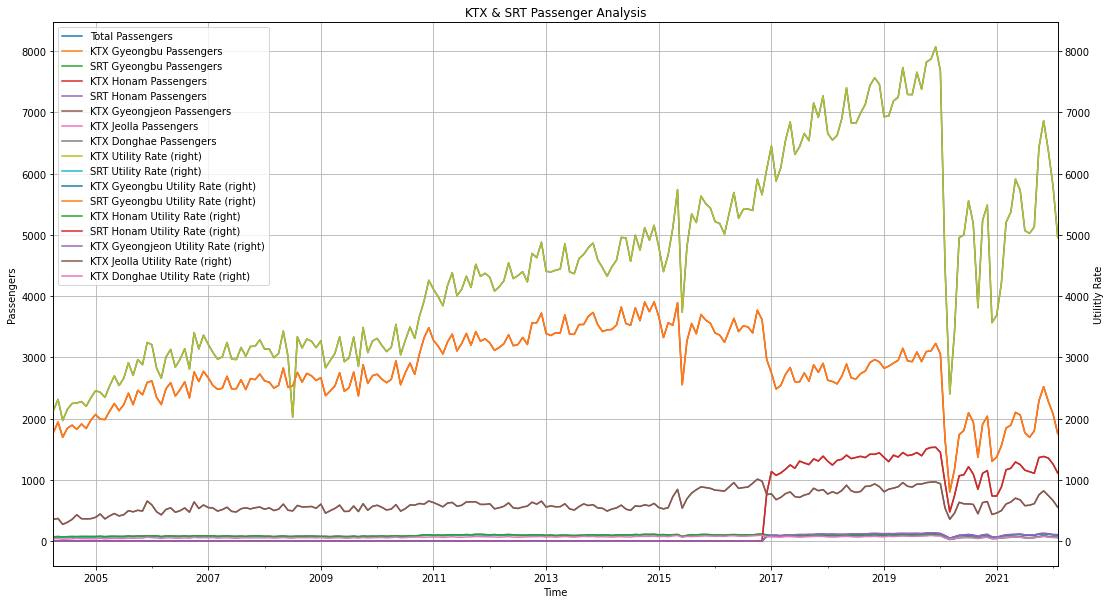

In [18]:
ax = time_series.plot(figsize=(18,10),secondary_y=utility_list,grid=True)
ax.set_ylabel('Passengers')
ax.right_ax.set_ylabel('Utilitly Rate')
plt.title('KTX & SRT Passenger Analysis')
plt.savefig('images/passen_analysis.png')

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

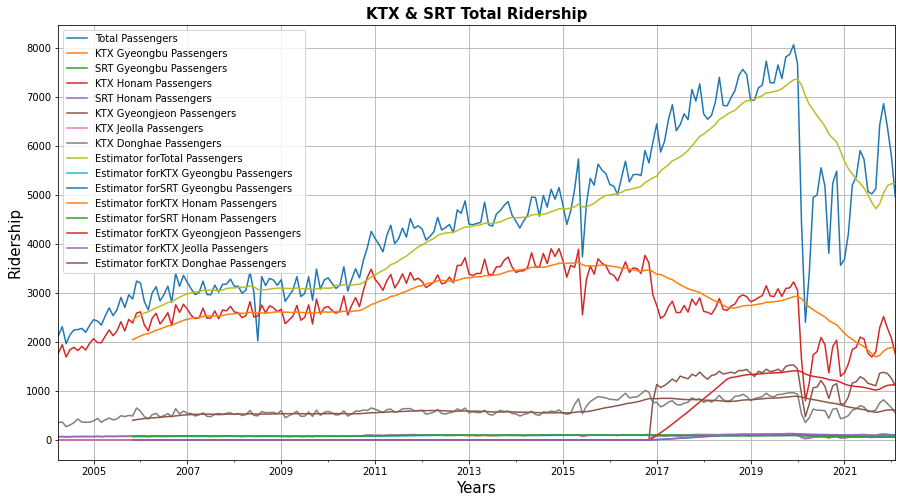

In [103]:
time_series[total_list].plot(figsize=(15,8))
for t in total_list:
    time_series.rolling(window=20).mean()[t].plot(label='Estimator for'+t)
plt.grid()
plt.xlabel('Years',fontsize=15)
plt.ylabel('Ridership',fontsize=15)
plt.title('KTX & SRT Total Ridership',fontsize=15,fontweight='bold')
plt.legend()

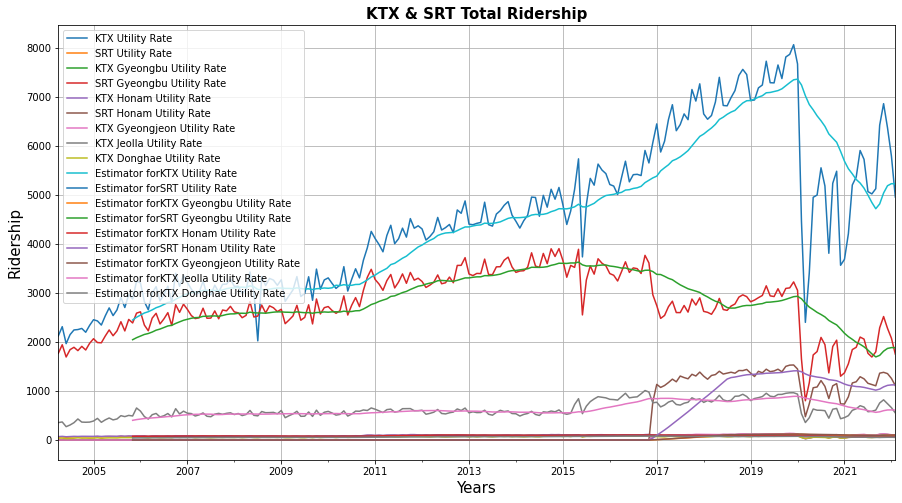

In [104]:
time_series[utility_list].plot(figsize=(15,8))
for t in utility_list:
    time_series.rolling(window=20).mean()[t].plot(label='Estimator for'+t)
plt.grid()
plt.xlabel('Years',fontsize=15)
plt.ylabel('Ridership',fontsize=15)
plt.title('KTX & SRT Total Ridership',fontsize=15,fontweight='bold')
plt.legend()

In [93]:
training_df = modified_time_df.iloc[:int(0.89*len(modified_time_df))]
test_df = modified_time_df.iloc[int(0.88*len(modified_time_df)):]

C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


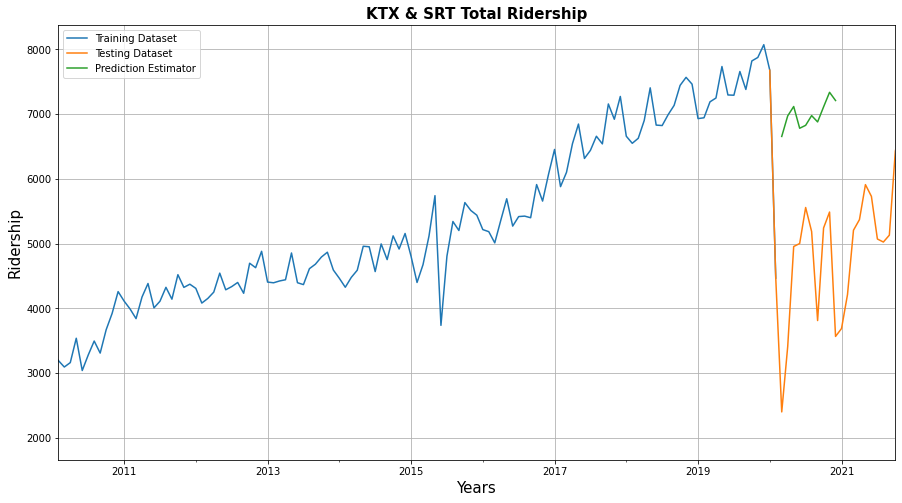

In [94]:
fit_model = ExponentialSmoothing(training_df['Total Passengers'],trend='add',seasonal='add',seasonal_periods=30).fit()
prediction = fit_model.forecast(10)
training_df['Total Passengers'].plot(figsize=(15,8),label='Training Dataset')
test_df['Total Passengers'].plot(label='Testing Dataset')
prediction.plot(xlim=['2010-02-01','2021-10-01'],label='Prediction Estimator')
plt.grid()
plt.xlabel('Years',fontsize=15)
plt.ylabel('Ridership',fontsize=15)
plt.title('KTX & SRT Total Ridership',fontsize=15,fontweight='bold')
plt.legend()

In [95]:
traffic_model = ExponentialSmoothing(training_df['Total Passengers'],trend='add',seasonal='add',seasonal_periods=14).fit()
passenger_forecast = traffic_model.forecast(80)
passenger_forecast

C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2020-03-01    6670.693631
2020-04-01    6972.776598
2020-05-01    6901.633635
2020-06-01    6976.223838
2020-07-01    7023.020860
                 ...     
2026-06-01    8418.739709
2026-07-01    8431.084175
2026-08-01    8512.490655
2026-09-01    8438.679919
2026-10-01    8534.853769
Freq: MS, Length: 80, dtype: float64

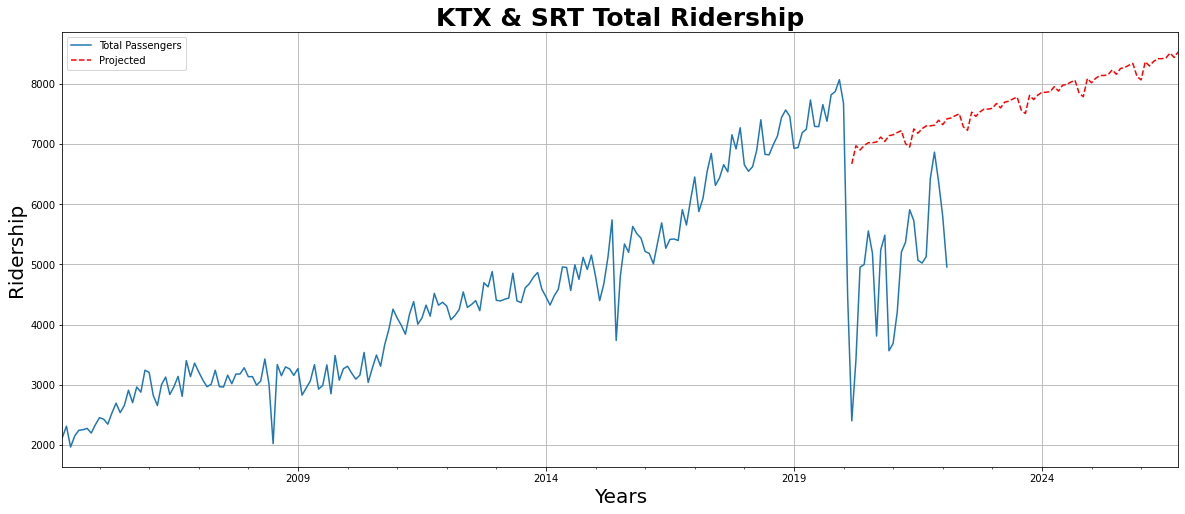

In [96]:
modified_time_df.plot(figsize=(20,8))
passenger_forecast.plot(label='Projected',style='--',color='r')
plt.grid()
plt.xlabel('Years',fontsize=20)
plt.ylabel('Ridership',fontsize=20)
plt.title('KTX & SRT Total Ridership',fontsize=25,fontweight='bold')
plt.legend()